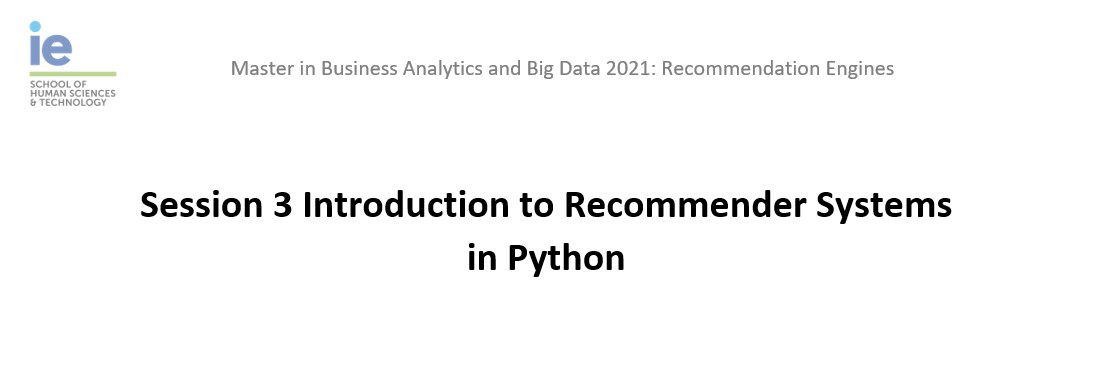

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

The 100k MovieLens ratings data set. The data was collected through the [MovieLens web site](http://movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998. The research group in charge, GroupLens, also made available a richer data set, containing millions of recommendation, [check available data sets](https://grouplens.org/datasets/movielens/). There is a csv (ratings) which contains about 100,000 ratings (1-5). Movie metadata is also provided in csv movies. It contains the title, year, IMDb URL and indicator variables for 19 genres for each movie.



## MovieLens datasets

In [2]:
#Change the path
movielens = pd.read_csv('ratings.csv')
movielens.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movielens_meta = pd.read_csv('movies.csv')
movielens_meta.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data = movielens.merge(movielens_meta,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


### Exercise
How many movies are in the dataset?

In [5]:
print("There are", 
      len(pd.unique(data['movieId'])),
      "movies in the dataset with rating and", len(pd.unique(movielens_meta['movieId'])), "in total")

There are 9724 movies in the dataset with rating and 58098 in total


How many users are in the dataset?

In [6]:
print("There are", 
      len(pd.unique(data['userId'])),
      "users in the dataset")

There are 610 users in the dataset


# Rating representation

## **Exercise**
 
Write a code that converts the MovieLense into a matrix as described in session 2 where each pair user-movie rating represents the rating given by $\text{user}_i$ to $\text{movie}_j$ and:
- rows (index $i$) represent users 
- columns (index $j$) represent movies

Hint: Use the function pivot_table

In [7]:
pd.pivot_table(data,index='userId',columns='movieId', values=['rating']).head().fillna('')

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1            4             4                    4                               
2                                                                               
3                                                                               
4                                                                               
5            4                                                                  

         ...                                                                 \
movieId  ... 193565 193567 193571 193573 193579 193581 193583 193585 193587   
userId   ...                                                                  
1        ...                                                                  
2        ...                                                                  
3        ...                                                                  
4        ...                                                                  
5        ...                                                                  

                
movieId 193609  
userId          
1               
2               
3               
4               
5               

[5 rows x 9724 columns]

# Exploratory data analysis (EDA)




The ratings are numbers in the range 0-5. Let's count the occurrences of each of them.

In [8]:
data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

### Exercise

Now, we can build a frequency plot of the ratings.

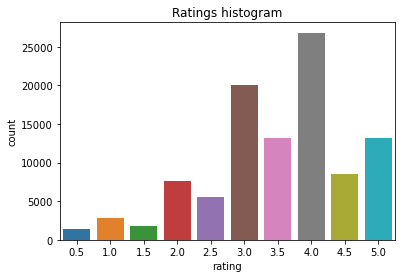

In [9]:
ax = sns.countplot(x="rating",data=data)
plt.title('Ratings histogram');

## Exploring rated movies

For instance, which are the most viewed movies? We can use groupby and agg for this
purpose. First, let's count the views for each movie:


In [10]:
views_per_movie = pd.DataFrame(data.groupby('title').agg(Total_Ratings=('rating','count')))
views_per_movie

,Total_Ratings
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5


### Exercise
Then, we can sort the movies by number of views. Get the 5 most rated films

In [11]:
top_5_most_rated_films = views_per_movie.sort_values(by='Total_Ratings',ascending=False).head().reset_index()
top_5_most_rated_films.index = np.arange(1, len(top_5_most_rated_films) + 1)
top_5_most_rated_films

,title,Total_Ratings
1,Forrest Gump (1994),329
2,"Shawshank Redemption, The (1994)",317
3,Pulp Fiction (1994),307
4,"Silence of the Lambs, The (1991)",279
5,"Matrix, The (1999)",278


### Exercise
Plot a histogram with the number of ratings

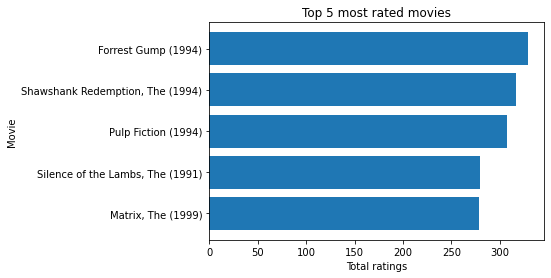

In [12]:
top_5_most_rated_films = top_5_most_rated_films.sort_values(by='Total_Ratings',ascending=True)
x = np.arange(5) + 1

plt.barh(x, width=top_5_most_rated_films['Total_Ratings'])
plt.yticks(x, top_5_most_rated_films['title']);

plt.title('Top 5 most rated movies')
plt.ylabel('Movie')
plt.xlabel('Total ratings');

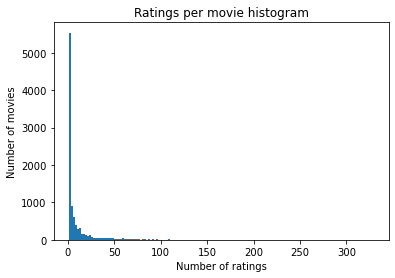

In [13]:
plt.hist(views_per_movie, bins=150)

plt.title('Ratings per movie histogram')
plt.ylabel('Number of movies')
plt.xlabel('Number of ratings');

## Exploring average rating per user

### Exercise
In previous section we explored movie average ratings, in this section you will need to repeat what we did in the above section with the ratings per user:
- Count views per user
- Order them
- Plot a histogram


In [14]:
views_per_user = pd.DataFrame(data.groupby('userId').agg(Total_Ratings=('rating','count')))
views_per_user.head()

,Total_Ratings
userId,
1,232
2,29
3,39
4,216
5,44


In [15]:
top_5_users = views_per_user.sort_values(by='Total_Ratings',ascending=False).head().reset_index()
top_5_users.index = np.arange(1, len(top_5_users) + 1)
top_5_users

,userId,Total_Ratings
1,414,2698
2,599,2478
3,474,2108
4,448,1864
5,274,1346


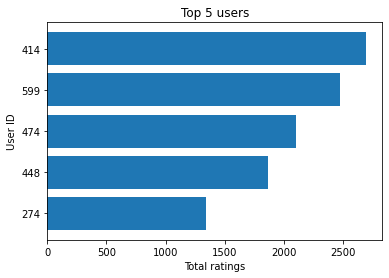

In [16]:
top_5_users = top_5_users.sort_values(by='Total_Ratings',ascending=True)
x = np.arange(5) + 1

plt.barh(x, width=top_5_users['Total_Ratings'])
plt.yticks(x, top_5_users['userId']);

plt.title('Top 5 users')
plt.ylabel('User ID')
plt.xlabel('Total ratings');

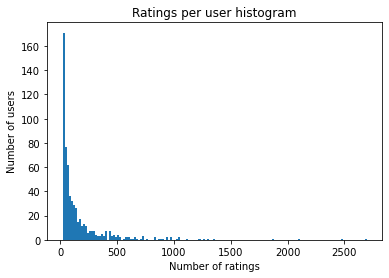

In [17]:
plt.hist(views_per_user, bins=150)

plt.title('Ratings per user histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of ratings');

## Bonus track

Please use this section to add any other analysis that you consider relevant. 
Suggestion, you can use a different dataset Idea


I will be exploring **average rating per year** with the **top 5 years with more ratings**, and the **higher and lower rated movies with more than 50 ratings**, to avoid those with few ratings, with **top 5s for both**.

## Exploring average rating per year

In [18]:
data = movielens.merge(movielens_meta,on='movieId', how='left')

In [19]:
bonus = data
bonus[['title', 'year']] = bonus['title'].str.split("(", 1, expand=True)

In [20]:
bonus['year'] = bonus['year'].str.replace(")", "")
bonus

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men,Comedy|Romance,1995
2,1,6,4.0,964982224,Heat,Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven,Mystery|Thriller,a.k.a. Se7en (1995
4,1,50,5.0,964982931,"Usual Suspects, The",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split,Drama|Horror|Thriller,2017
100832,610,168248,5.0,1493850091,John Wick: Chapter Two,Action|Crime|Thriller,2017
100833,610,168250,5.0,1494273047,Get Out,Horror,2017
100834,610,168252,5.0,1493846352,Logan,Action|Sci-Fi,2017


I will be assuming some errors in the year column as there are few different titles that contain parenthesis, points and will not alter the general result.

In [21]:
views_per_year = pd.DataFrame(bonus.groupby('year').agg(Total_Ratings=('rating','count')))
views_per_year.head()

top_5_years = views_per_year.sort_values(by='Total_Ratings',ascending=False).head().reset_index()
top_5_years.index = np.arange(1, len(top_5_years) + 1)
top_5_years

,year,Total_Ratings
1,1995,5580
2,1994,4813
3,1999,4468
4,1996,4214
5,2000,3977


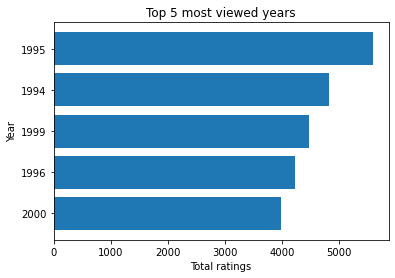

In [22]:
top_5_years = top_5_years.sort_values(by='Total_Ratings',ascending=True)
x = np.arange(5) + 1

plt.barh(x, width=top_5_years['Total_Ratings'])
plt.yticks(x, top_5_years['year']);

plt.title('Top 5 most viewed years')
plt.ylabel('Year')
plt.xlabel('Total ratings');

## Higher and lower rated movies

In [23]:
data = movielens.merge(movielens_meta,on='movieId', how='left')

In [24]:
average_ratings = pd.DataFrame(data.groupby('title').mean())
average_ratings = average_ratings.reset_index()

In [25]:
more_50 =  views_per_movie['Total_Ratings']>50

In [26]:
more_50 = views_per_movie[more_50]
more_50 = more_50.reset_index()

In [27]:
more_50

,title,Total_Ratings
0,10 Things I Hate About You (1999),54
1,12 Angry Men (1957),57
2,2001: A Space Odyssey (1968),109
3,28 Days Later (2002),58
4,300 (2007),80
...,...,...
432,X-Men: The Last Stand (2006),52
433,X2: X-Men United (2003),76
434,Young Frankenstein (1974),69
435,Zombieland (2009),53


In [28]:
average_ratings_over_50 = average_ratings[average_ratings['title'].isin(more_50['title'])]
                                          
average_ratings_over_50= average_ratings_over_50.drop(['userId', 'movieId', 
                'timestamp'], axis=1)

average_ratings_over_50

,title,rating
18,10 Things I Hate About You (1999),3.527778
34,12 Angry Men (1957),4.149123
74,2001: A Space Odyssey (1968),3.894495
89,28 Days Later (2002),3.974138
104,300 (2007),3.681250
...,...,...
9620,X-Men: The Last Stand (2006),3.355769
9621,X2: X-Men United (2003),3.723684
9656,Young Frankenstein (1974),3.992754
9699,Zombieland (2009),3.877358


In [29]:
top_5_rated_movies = average_ratings_over_50.sort_values(by='rating',ascending=False).head()
top_5_rated_movies.index = np.arange(5) + 1

top_5_rated_movies

,title,rating
1,"Shawshank Redemption, The (1994)",4.429022
2,"Godfather, The (1972)",4.289062
3,Fight Club (1999),4.272936
4,Cool Hand Luke (1967),4.271930
5,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041


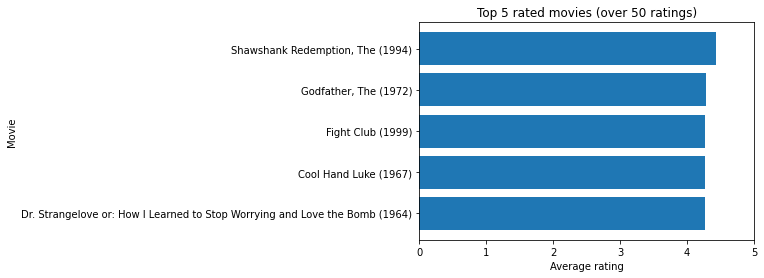

In [30]:
top_5_rated_movies = top_5_rated_movies.sort_values(by='rating',ascending=True)
x = np.arange(5) + 1

plt.barh(x, width=top_5_rated_movies['rating'])
plt.yticks(x, top_5_rated_movies['title']);

plt.xlim(0, 5)
plt.title('Top 5 rated movies (over 50 ratings)')
plt.ylabel('Movie')
plt.xlabel('Average rating');

In [31]:
top_5_worst_rated_movies = average_ratings_over_50.sort_values(by='rating',ascending=True).head()
top_5_worst_rated_movies.index = np.arange(5) + 1

top_5_worst_rated_movies

,title,rating
1,Wild Wild West (1999),2.207547
2,Coneheads (1993),2.420635
3,City Slickers II: The Legend of Curly's Gold (...,2.645455
4,Judge Dredd (1995),2.669355
5,Johnny Mnemonic (1995),2.679245


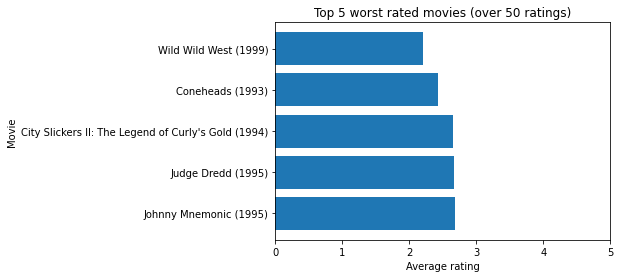

In [32]:
top_5_worst_rated_movies = top_5_worst_rated_movies.sort_values(by='rating',ascending=False)
x = np.arange(5) + 1

plt.barh(x, width=top_5_worst_rated_movies['rating'])
plt.yticks(x, top_5_worst_rated_movies['title']);

plt.xlim(0, 5)
plt.title('Top 5 worst rated movies (over 50 ratings)')
plt.ylabel('Movie')
plt.xlabel('Average rating');